In [1]:
import numpy as np
import pandas as pd

In [2]:
movies=pd.read_csv('movieproject.csv')
ratings=pd.read_csv('ratings.csv')

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
new_data=ratings.merge(movies,on='movieId')
new_data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [6]:
# 1 2 3 4 5 user_id
# 1 4.0
# 2 Nan
# 3 4.0
# 4 Nan
#movies id
final_dataset=ratings.pivot(index='movieId',columns='userId',values='rating')

In [7]:
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
final_dataset.fillna(0,inplace=True)

In [9]:
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
no_user_voted =ratings.groupby("movieId")['rating'].agg('count')
no_movies_voted =ratings.groupby("userId")['rating'].agg('count')

In [11]:
no_user_voted

movieId
1         215
2         110
3          52
4           7
5          49
         ... 
193581      1
193583      1
193585      1
193587      1
193609      1
Name: rating, Length: 9724, dtype: int64

In [12]:
no_movies_voted

userId
1       232
2        29
3        39
4       216
5        44
       ... 
606    1115
607     187
608     831
609      37
610    1302
Name: rating, Length: 610, dtype: int64

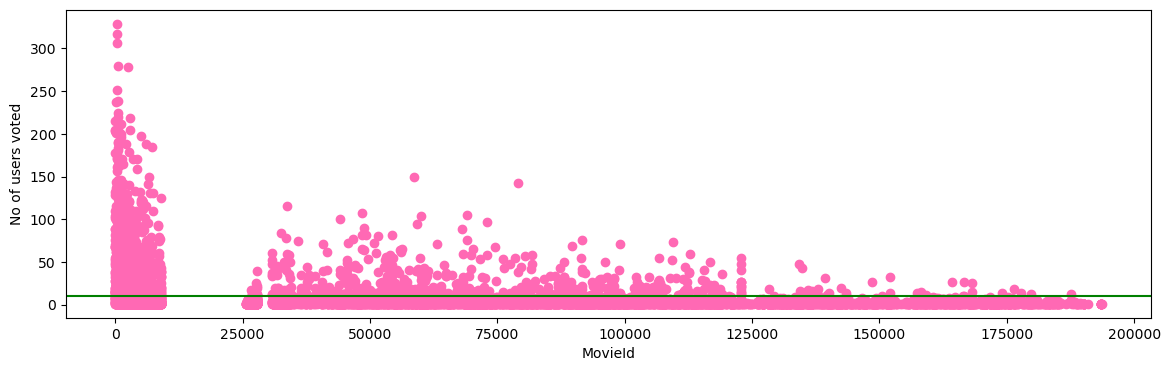

In [13]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots (1,1, figsize=(14,4))
plt.scatter (no_user_voted.index, no_user_voted, color="hotpink")
plt.axhline(y=10, color='green')
plt.xlabel("MovieId")
plt.ylabel("No of users voted")
plt.show()

In [14]:
final_dataset.loc[no_user_voted[no_user_voted>10].index,:]#users with having 0 voting are removed

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


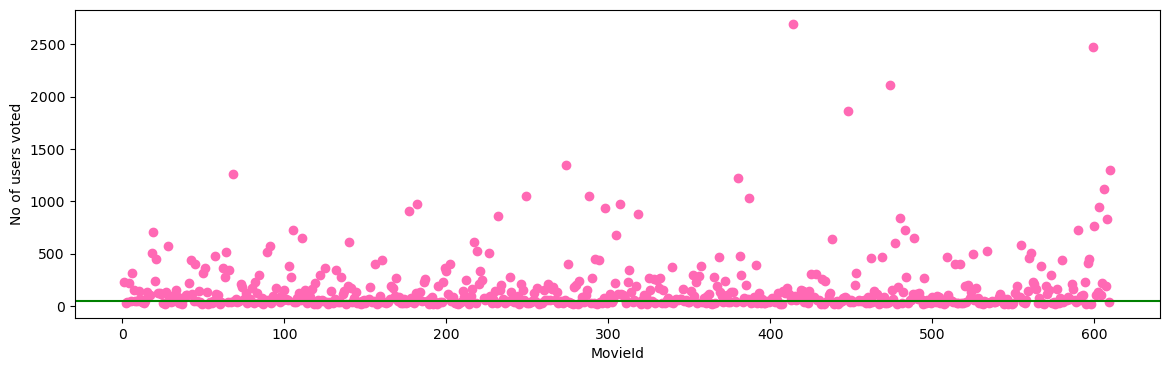

In [15]:
fig, axes = plt.subplots (1,1, figsize=(14,4))
plt.scatter (no_movies_voted.index, no_movies_voted, color="hotpink")
plt.axhline(y=50, color='green')
plt.xlabel("MovieId")
plt.ylabel("No of users voted")
plt.show()

In [16]:
final_dataset.loc[:,no_movies_voted[no_movies_voted>50].index]#as you can see that the data has now 378 columns so means which movies have no voting are removed 

userId,1,4,6,7,10,11,15,16,17,18,...,600,601,602,603,604,605,606,607,608,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,4.5,0.0,0.0,2.5,0.0,4.5,3.5,...,2.5,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,5.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,4.0,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0
3,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
4,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
final_dataset.shape

(9724, 610)

In [18]:
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
2121*378


801738

In [20]:
from scipy.sparse import csr_matrix
csr_data =csr_matrix(final_dataset.values)
final_dataset.reset_index(inplace=True)

In [21]:
print(csr_data)

  (0, 0)	4.0
  (0, 4)	4.0
  (0, 6)	4.5
  (0, 14)	2.5
  (0, 16)	4.5
  (0, 17)	3.5
  (0, 18)	4.0
  (0, 20)	3.5
  (0, 26)	3.0
  (0, 30)	5.0
  (0, 31)	3.0
  (0, 32)	3.0
  (0, 39)	5.0
  (0, 42)	5.0
  (0, 43)	3.0
  (0, 44)	4.0
  (0, 45)	5.0
  (0, 49)	3.0
  (0, 53)	3.0
  (0, 56)	5.0
  (0, 62)	5.0
  (0, 63)	4.0
  (0, 65)	4.0
  (0, 67)	2.5
  (0, 70)	5.0
  :	:
  (9700, 337)	2.5
  (9701, 337)	3.0
  (9702, 183)	4.0
  (9702, 247)	3.5
  (9703, 317)	2.5
  (9704, 209)	1.0
  (9705, 461)	2.5
  (9706, 49)	3.5
  (9707, 337)	1.5
  (9708, 337)	4.0
  (9709, 337)	1.0
  (9710, 337)	1.5
  (9711, 337)	1.0
  (9712, 337)	1.0
  (9713, 183)	4.5
  (9714, 183)	3.5
  (9715, 183)	3.0
  (9716, 183)	4.0
  (9717, 183)	4.0
  (9718, 183)	3.5
  (9719, 183)	4.0
  (9720, 183)	3.5
  (9721, 183)	3.5
  (9722, 183)	3.5
  (9723, 330)	4.0


In [22]:
import numpy as np
sample = np.array([[1,0,0,0,0], [0,0,2,0,0], [0,0,4,0,0]])
sparsity=1.0-(np.count_nonzero(sample)/ float(sample.size))
print(sparsity)

0.8


In [23]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors (metric='cosine', algorithm = 'brute', n_neighbors =20, n_jobs = -1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [53]:
def get_recommendation(movie_name):
    movie_list = movies[movies['title'].str.contains(movie_name)]

    if len(movie_list):
        movie_idx = movie_list.iloc[0]['movieId']
        movie_idx = final_dataset[final_dataset['movieId'] == movie_idx].index[0]

        distance, indices = knn.kneighbors(csr_data[movie_idx], n_neighbors=11)
        rec_movies_indices = sorted(list(zip(indices.squeeze().tolist(), distance.squeeze().tolist())), key=lambda x: x[1])

        recommended_movies = []
        for val in rec_movies_indices[1:]:  # Skip the first item as it's the same movie
            movie_idx = final_dataset.iloc[val[0]]["movieId"]
            idx = movies[movies['movieId'] == movie_idx].index
            recommended_movies.append({'Title': movies.iloc[idx]['title'].values[0], 'Distance': val[1]})

        # Ensure 10 recommendations by slicing the list
        recommended_movies = recommended_movies[:10]

        df = pd.DataFrame(recommended_movies)
        print(df)

    else:
        print("Movie not found...")

NameError: name 'get_recommendation' is not defined

In [61]:
!pip install gradio

  Obtaining dependency information for gradio from https://files.pythonhosted.org/packages/62/d5/e0ead9998329c7d7b2e69888763c4418f309099664fc21b55e98694f5273/gradio-4.41.0-py3-none-any.whl.metadata
  Obtaining dependency information for fastapi from https://files.pythonhosted.org/packages/39/b0/0981f9eb5884245ed6678af234f2cbcd40f44570718caddc0360bdb4015d/fastapi-0.112.1-py3-none-any.whl.metadata
  Obtaining dependency information for ffmpy from https://files.pythonhosted.org/packages/ff/1e/db99aa669eee301966bc6c997d60a0240f9cecae63f044b2e5a5310e4bf7/ffmpy-0.4.0-py3-none-any.whl.metadata
  Obtaining dependency information for gradio-client==1.3.0 from https://files.pythonhosted.org/packages/de/fe/7e9cb4d0e6aa74268fa31089189e4855882a0f2a36c45d359336946d4ae1/gradio_client-1.3.0-py3-none-any.whl.metadata
  Obtaining dependency information for httpx>=0.24.1 from https://files.pythonhosted.org/packages/41/7b/ddacf6dcebb42466abd03f368782142baa82e08fc0c1f8eaa05b4bae87d5/httpx-0.27.0-py3-none-a

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\vikas\\anaconda3\\Lib\\site-packages\\~ydantic\\annotated_types.cp311-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [75]:
import gradio as gr
def recommend_movies (movie_name):
    df = get_recommendation (movie_name)
    if isinstance(df, pd.DataFrame) :
        return df.to_string(index=False)
    else:
        return df
app = gr.Interface(
    fn = recommend_movies,
    inputs ="text",
    outputs ="text",
    description = "Enter a movie name to get a list of recommended movies"
)

app.launch()

ModuleNotFoundError: No module named 'gradio'

C:\Users\vikas\anaconda3\python.exe


In [77]:
import gradio as gr

ModuleNotFoundError: No module named 'gradio'

In [78]:
from flask import Flask, render_template, request

app = Flask(__name__)

def recommend_movies(user_preferences):
  # Replace this with your recommendation logic
  recommended_movies = ["Movie A", "Movie B", "Movie C"]
  return recommended_movies

@app.route('/', methods=['GET', 'POST'])
def index():
  if request.method == 'POST':
    user_preferences = request.form['preferences']
    recommendations = recommend_movies(user_preferences)
    return render_template('results.html', recommendations=recommendations)
  return render_template('index.html')

if __name__ == '__main__':
  app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\vikas\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3534: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [80]:
from flask import Flask, render_template, request
import pandas as pd

# Assuming you have imported necessary libraries for your recommendation logic
# ...

app = Flask(__name__)

# Your recommendation function
def get_recommendation(movie_name):
    movie_list = movies[movies['title'].str.contains(movie_name)]

    if len(movie_list):
        movie_idx = movie_list.iloc[0]['movieId']
        movie_idx = final_dataset[final_dataset['movieId'] == movie_idx].index[0]

        distance, indices = knn.kneighbors(csr_data[movie_idx], n_neighbors=11)
        rec_movies_indices = sorted(list(zip(indices.squeeze().tolist(), distance.squeeze().tolist())), key=lambda x: x[1])

        recommended_movies = []
        for val in rec_movies_indices[1:]:  # Skip the first item as it's the same movie
            movie_idx = final_dataset.iloc[val[0]]["movieId"]
            idx = movies[movies['movieId'] == movie_idx].index
            recommended_movies.append({'Title': movies.iloc[idx]['title'].values[0], 'Distance': val[1]})

        # Ensure 10 recommendations by slicing the list
        recommended_movies = recommended_movies[:10]

        df = pd.DataFrame(recommended_movies)
        print(df)

    else:
        print("Movie not found...")
  

@app.route('/', methods=['GET', 'POST'])
def index():
  if request.method == 'POST':
    movie_name = request.form['movie_name']
    recommendations = get_recommendation(movie_name)
    if not recommendations.empty:
      return render_template('results.html', recommendations=recommendations)
    else:
      return render_template('error.html', message="Movie not found")
  return render_template('index.html')

if __name__ == '__main__':
  app.run(host='0.0.0.0', port=8080,debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:8080
 * Running on http://192.168.158.146:8080
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1